In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
# Load datasets
brent = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\brent_inr.csv")
wti = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\wti_inr.csv")

nifty50 = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\Nifty50.csv")
nifty100 = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\Nifty100.csv")
nifty200 = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\Nifty200.csv")
nifty500 = pd.read_csv(r"C:\Users\Stevi\OneDrive\Documents\Projects\Crude-Oil\Data ingestion\Nifty500.csv")

In [99]:
# Preview top rows and columns
datasets = {
    "Brent": brent,
    "WTI": wti,
    "Nifty50": nifty50,
    "Nifty100": nifty100,
    "Nifty200": nifty200,
    "Nifty500": nifty500
}

In [100]:
for name, df in datasets.items():
    print(f"\n📁 {name} — Shape: {df.shape}")
    print(df.head(3))


📁 Brent — Shape: (384, 6)
         Date    Close     High      Low     Open     Volume
0  2024-01-02  6314.25  6576.33  6290.12  6424.07  2378845.5
1  2024-01-03  6318.37  6580.63  6294.23  6428.27  2380401.0
2  2024-01-04  6323.01  6585.46  6298.85  6432.99  2382147.8

📁 WTI — Shape: (384, 6)
         Date    Close     High      Low     Open       Volume
0  2024-01-02  5855.80  6127.04  5829.17  5966.46  27539394.51
1  2024-01-03  5859.63  6131.05  5832.99  5970.36  27557402.20
2  2024-01-04  5863.93  6135.54  5837.27  5974.74  27577624.55

📁 Nifty50 — Shape: (3079, 8)
         Date         Open         High          Low        Close  \
0  2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000   
1  2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000   
2  2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902   

     Adj Close  Volume   Ticker  
0  5993.250000       0  Nifty50  
1  6009.500000       0  Nifty50  
2  6016.149902       0  Nifty50  

📁 Nifty1

In [101]:
# Clean and rename
brent = brent[["Date", "Close"]].rename(columns={"Close": "brent_price"})
nifty50 = nifty50[["Date", "Close"]].rename(columns={"Close": "nifty_price"})

In [102]:
# Merge on Date
df = pd.merge(brent, nifty50, on="Date")
df = df.sort_values("Date").dropna()

In [103]:
df

,Date,brent_price,nifty_price
0,2024-01-02,6314.25,21665.800781
1,2024-01-03,6318.37,21517.349609
2,2024-01-04,6323.01,21658.599609
3,2024-01-05,6317.13,21710.800781
4,2024-01-08,6313.37,21513.000000
...,...,...,...
359,2025-07-08,6518.34,25522.500000
360,2025-07-09,6504.33,25476.099609
361,2025-07-10,6504.42,25355.250000
362,2025-07-11,6506.41,25149.849609


In [104]:
# Calculate returns and volatility
df['brent_ret'] = df['brent_price'].pct_change()
df['nifty_ret'] = df['nifty_price'].pct_change()
df['brent_vol'] = df['brent_ret'].rolling(10).std()
df['nifty_vol'] = df['nifty_ret'].rolling(10).std()
df.dropna(inplace=True)

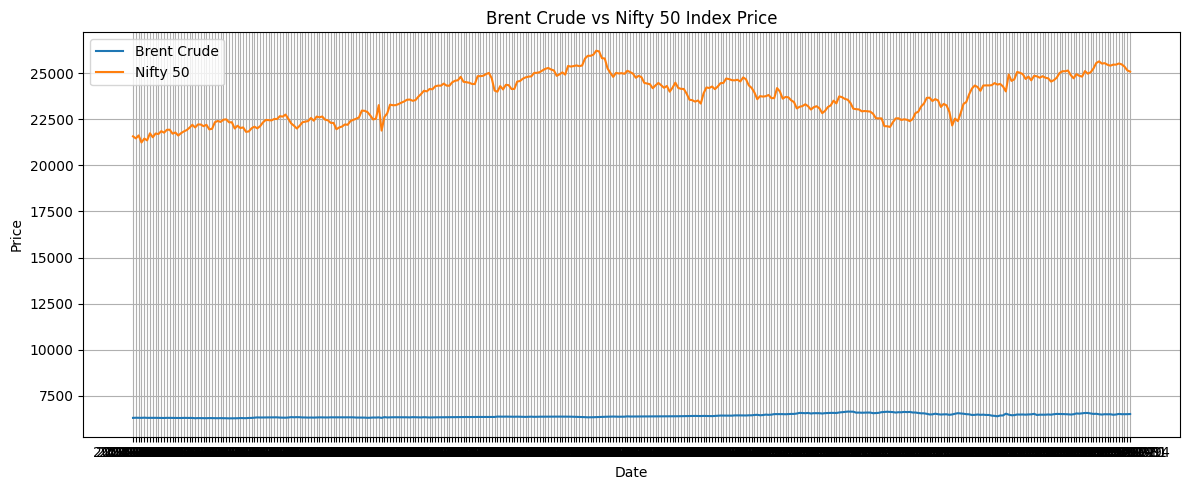

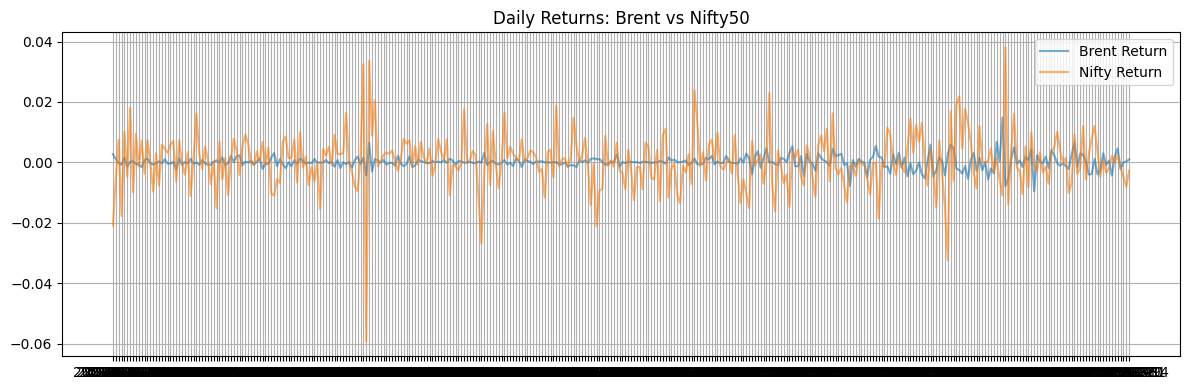

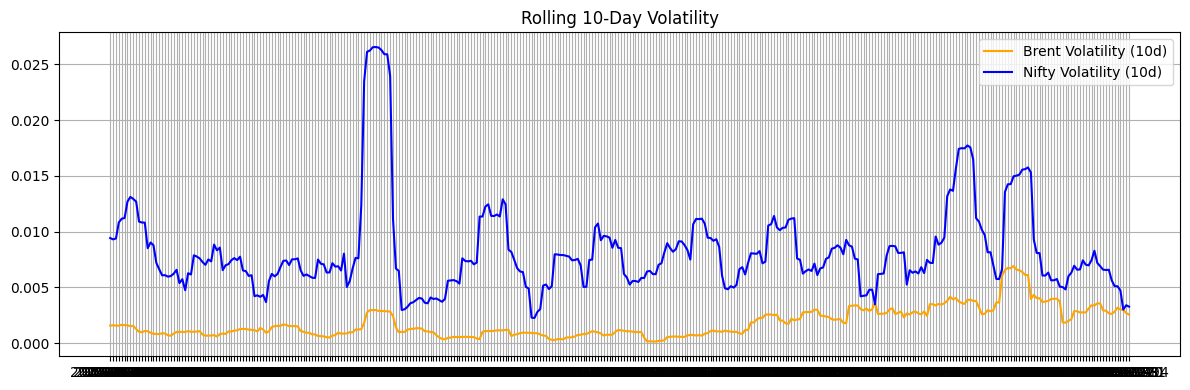

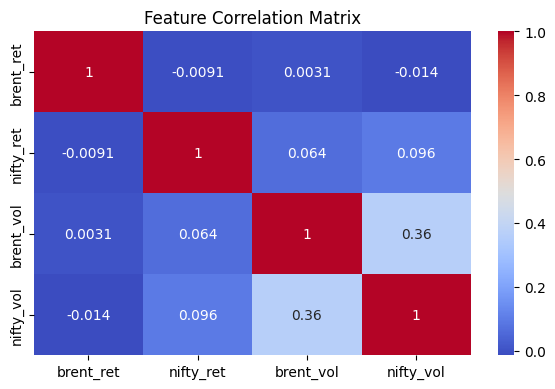

In [105]:
# 1. Price Plot
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['brent_price'], label='Brent Crude')
plt.plot(df['Date'], df['nifty_price'], label='Nifty 50')
plt.legend()
plt.title("Brent Crude vs Nifty 50 Index Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.tight_layout()
plt.show()

# 2. Return Plot
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['brent_ret'], label='Brent Return', alpha=0.6)
plt.plot(df['Date'], df['nifty_ret'], label='Nifty Return', alpha=0.6)
plt.title("Daily Returns: Brent vs Nifty50")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 3. Volatility
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['brent_vol'], label='Brent Volatility (10d)', color='orange')
plt.plot(df['Date'], df['nifty_vol'], label='Nifty Volatility (10d)', color='blue')
plt.title("Rolling 10-Day Volatility")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df[['brent_ret', 'nifty_ret', 'brent_vol', 'nifty_vol']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [106]:
df[['brent_ret', 'nifty_ret', 'brent_vol', 'nifty_vol']].describe()

,brent_ret,nifty_ret,brent_vol,nifty_vol
count,354.000000,354.000000,354.000000,354.000000
mean,0.000102,0.000408,0.001821,0.008253
std,0.002215,0.009102,0.001330,0.004132
min,-0.009499,-0.059294,0.000142,0.002257
25%,-0.000696,-0.004039,0.000860,0.006064
50%,0.000024,0.000167,0.001214,0.007353
75%,0.001011,0.005097,0.002755,0.009169
max,0.014914,0.038183,0.006911,0.026560


In [107]:
# Pearson correlation
corr = df['brent_ret'].corr(df['nifty_ret'])
print(f"Pearson Correlation (Daily Return): {corr:.4f}")

Pearson Correlation (Daily Return): -0.0091


In [108]:
import statsmodels.api as sm

X = sm.add_constant(df['brent_ret'])
y = df['nifty_ret']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              nifty_ret   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.02897
Date:                Tue, 15 Jul 2025   Prob (F-statistic):              0.865
Time:                        12:44:46   Log-Likelihood:                 1161.7
No. Observations:                 354   AIC:                            -2319.
Df Residuals:                     352   BIC:                            -2312.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      0.849      0.3

In [109]:
from statsmodels.tsa.stattools import grangercausalitytests

# Test for 1 to 5 lags
grangercausalitytests(df[['nifty_ret', 'brent_ret']], maxlag=5, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3125  , p=0.5765  , df_denom=350, df_num=1
ssr based chi2 test:   chi2=0.3151  , p=0.5745  , df=1
likelihood ratio test: chi2=0.3150  , p=0.5746  , df=1
parameter F test:         F=0.3125  , p=0.5765  , df_denom=350, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3642  , p=0.2570  , df_denom=347, df_num=2
ssr based chi2 test:   chi2=2.7676  , p=0.2506  , df=2
likelihood ratio test: chi2=2.7568  , p=0.2520  , df=2
parameter F test:         F=1.3642  , p=0.2570  , df_denom=347, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8371  , p=0.4742  , df_denom=344, df_num=3
ssr based chi2 test:   chi2=2.5625  , p=0.4641  , df=3
likelihood ratio test: chi2=2.5532  , p=0.4658  , df=3
parameter F test:         F=0.8371  , p=0.4742  , df_denom=344, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9025  , p=0.1096  

c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{np.int64(1): ({'ssr_ftest': (np.float64(0.3124624914219825),
    np.float64(0.5765304924185432),
    np.float64(350.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.31514074134845665),
    np.float64(0.5745426207339592),
    np.int64(1)),
   'lrtest': (np.float64(0.3150001540707308),
    np.float64(0.5746279770331877),
    np.int64(1)),
   'params_ftest': (np.float64(0.31246249142191895),
    np.float64(0.5765304924185906),
    np.float64(350.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(1.364150699434072),
    np.float64(0.25696489459178384),
    np.float64(347.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(2.7676140991400193),
    np.float64(0.25062260186889146),
    np.int64(2)),
   'lrtest': (np.float64(2.7567905574546785),
    np.float64(0.25198259061272066),
    np.int64(2)),
   'params_ftest': (np.float64(1.3641506994340564),
    np.float64(0.25696489459178523),
    np.float64(347.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
 

In [110]:
from statsmodels.tsa.api import VAR

data = df[['nifty_ret', 'brent_ret']]
model = VAR(data)
result = model.fit(maxlags=5, ic='aic')
result.summary()


c:\Users\Stevi\OneDrive\Documents\Projects\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 15, Jul, 2025
Time:                     12:45:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -21.5837
Nobs:                     351.000    HQIC:                  -21.6764
Log likelihood:           2832.87    FPE:                3.62621e-10
AIC:                     -21.7377    Det(Omega_mle):     3.48579e-10
--------------------------------------------------------------------
Results for equation nifty_ret
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.000474         0.000485            0.977           0.329
L1.nifty_ret        -0.119031         0.053798           -2.213           0.027
L1.brent_ret         0.208445         0.230124            0.